In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re
import json
import ast

In [2]:
#plt.style.use('seaborn-white')
plt.style.use('seaborn')

In [3]:
animes = pd.read_csv('anime_cleaned.csv')
users = pd.read_csv('users_cleaned.csv')
animelists = pd.read_csv('animelists_cleaned.csv')

In [4]:
users['birth_date'] = pd.to_datetime(users['birth_date'])
users['last_online'] = pd.to_datetime(users['last_online'])
users['join_date'] = pd.to_datetime(users['join_date'])

In [5]:
animes.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0


In [6]:
animes.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min'],
      dtype='object')

In [7]:
animes[['title', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min']].head()

,title,type,source,episodes,status,airing,aired_string,aired,duration,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min
0,Inu x Boku SS,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0
1,Seto no Hanayome,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0
2,Shugo Chara!! Doki,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0
3,Princess Tutu,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0
4,Bakuman. 3rd Season,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0


In [8]:
animes['aired_from'] = pd.to_datetime(animes['aired'].apply(lambda x: ast.literal_eval(x.replace('\'', '"'))['from']), errors='coerce')

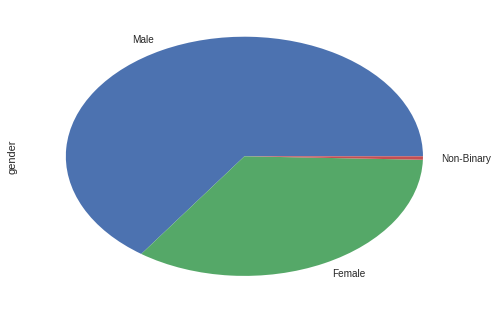

In [9]:
users['gender'].value_counts().plot.pie()

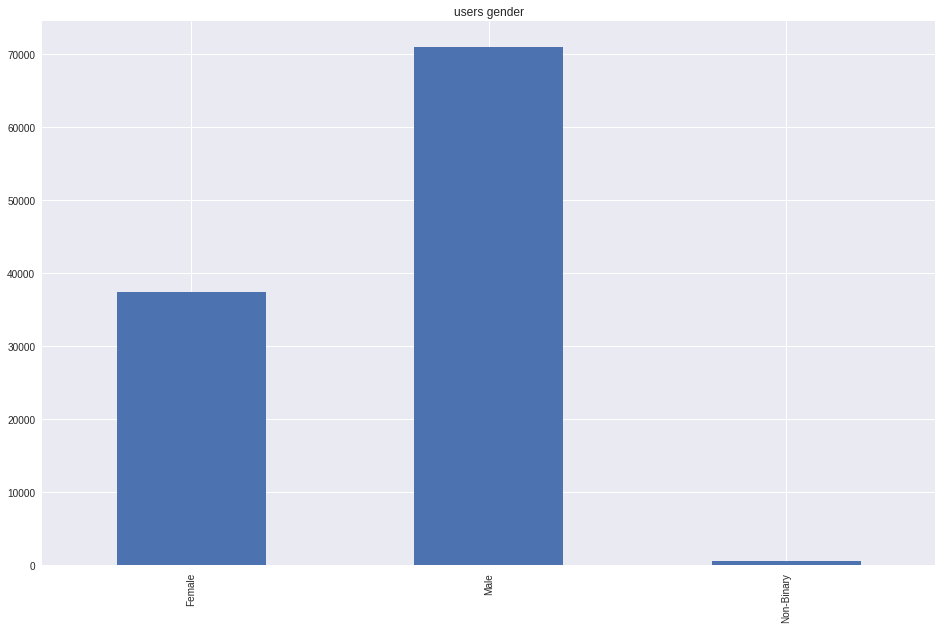

In [10]:
users['gender'].value_counts().sort_index().plot.bar(figsize=(16, 10), title='users gender')

In [11]:
users['age'] = 2018 - users['birth_date'].dt.year

In [12]:
print(users['age'].min())
print(users['age'].max())


10
49


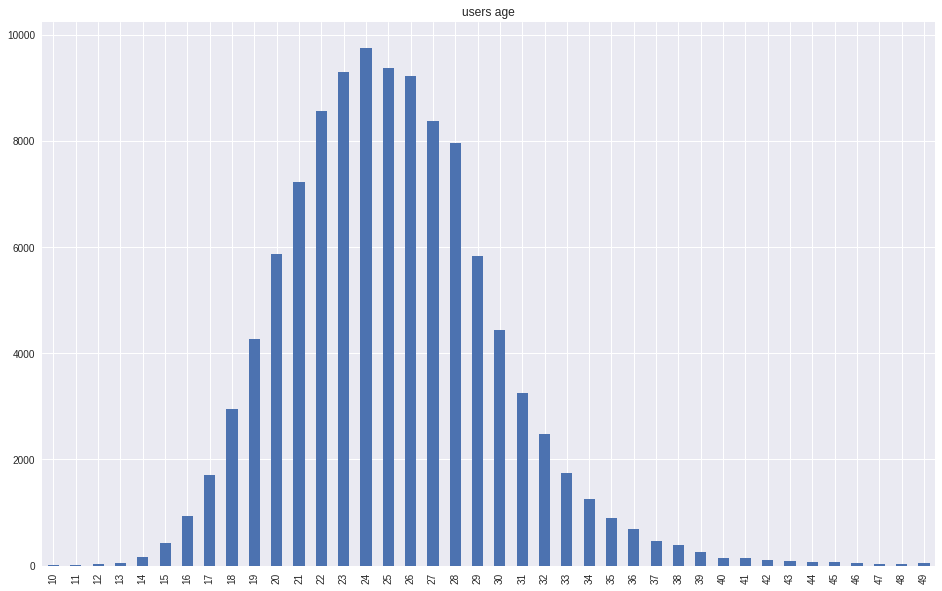

In [13]:
users['age'].value_counts().sort_index().plot.bar(figsize=(16, 10), title='users age')

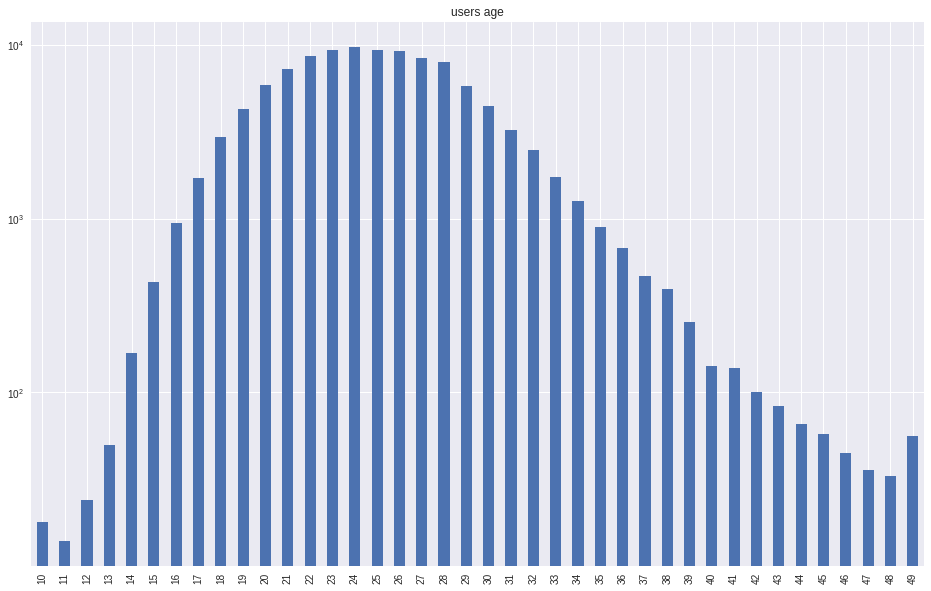

In [14]:
users['age'].value_counts().sort_index().plot.bar(figsize=(16, 10), title='users age', logy=True)

In [15]:
users['age'].describe()

count    108717.000000
mean         25.126080
std           4.632599
min          10.000000
25%          22.000000
50%          25.000000
75%          28.000000
max          49.000000
Name: age, dtype: float64

In [16]:
((users['age'] > 45) | (users['age'] < 10)).sum() / users['age'].count()

0.0015636928907162633

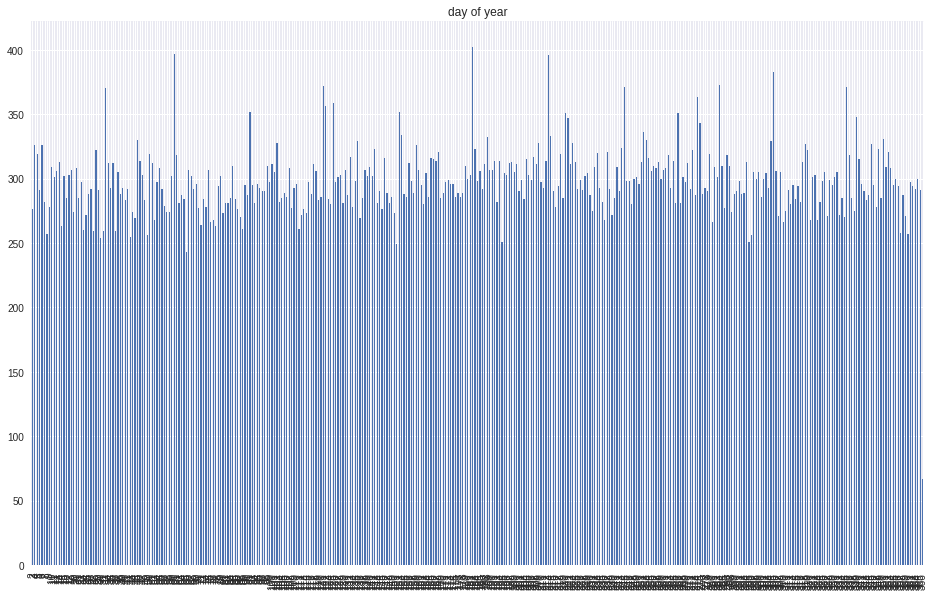

In [17]:
users['birth_date'].dt.dayofyear.value_counts().sort_index().plot.bar(figsize=(16, 10), title='day of year')

In [18]:
display(users[users['birth_date'].dt.dayofyear == 1]['age'].describe())
display(users['age'].describe())


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age, dtype: float64

count    108717.000000
mean         25.126080
std           4.632599
min          10.000000
25%          22.000000
50%          25.000000
75%          28.000000
max          49.000000
Name: age, dtype: float64

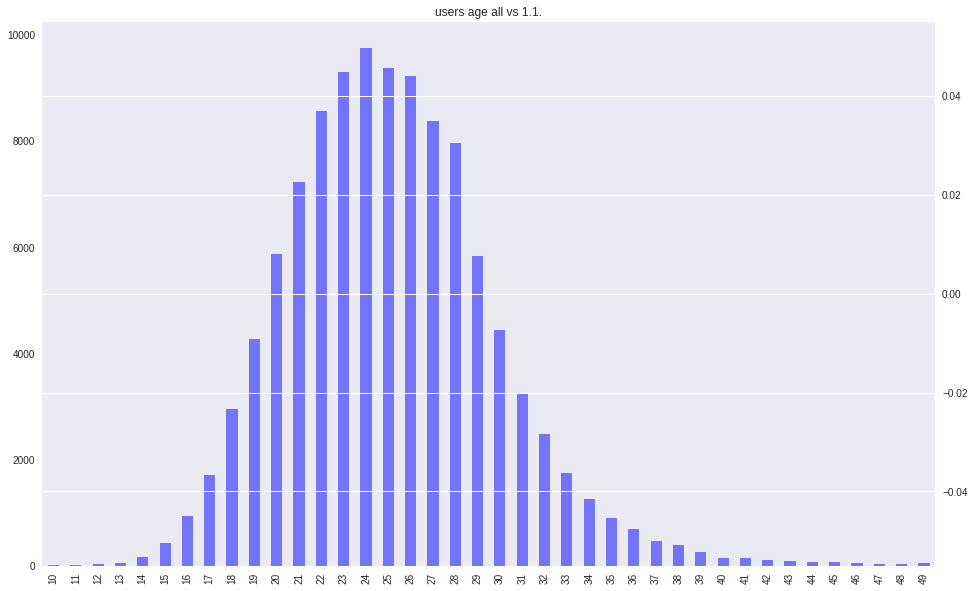

In [19]:
total_count = users['age'].count()
first_jan_count = users[users['birth_date'].dt.dayofyear == 1]['age'].count()
plt.figure(figsize=(16, 10))
ax = plt.gca()

users_in_first_jan = users[users['birth_date'].dt.dayofyear == 1]['age'].value_counts()
users_in_first_jan = users_in_first_jan.reindex(users['age'].value_counts().index)
users['age'].value_counts().sort_index().plot.bar(ax=ax, title='users age all vs 1.1.', color='blue', alpha=0.5)
users_in_first_jan.sort_index().plot.bar(ax=ax, color='red', alpha=0.5, secondary_y=True)
#ax.set_xlim(users['age'].min(), users['age'].max())
#plt.xticks(users['age'].value_counts().index)
plt.show()

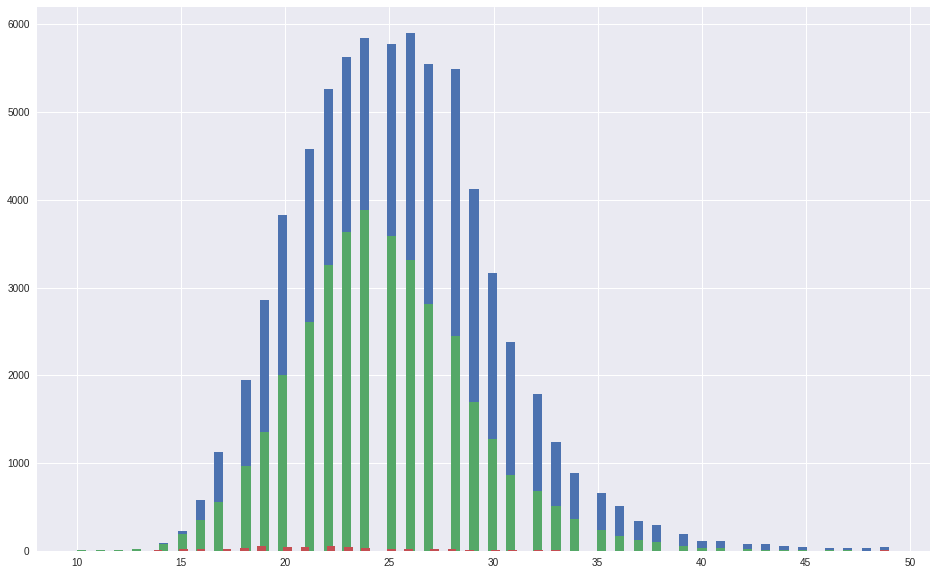

In [25]:
users[users['gender'] == 'Male']['age'].hist(bins=89, figsize=(16,10))
users[users['gender'] == 'Female']['age'].hist(bins=89, figsize=(16,10))
users[users['gender'] == 'Non-Binary']['age'].hist(bins=89, figsize=(16,10))


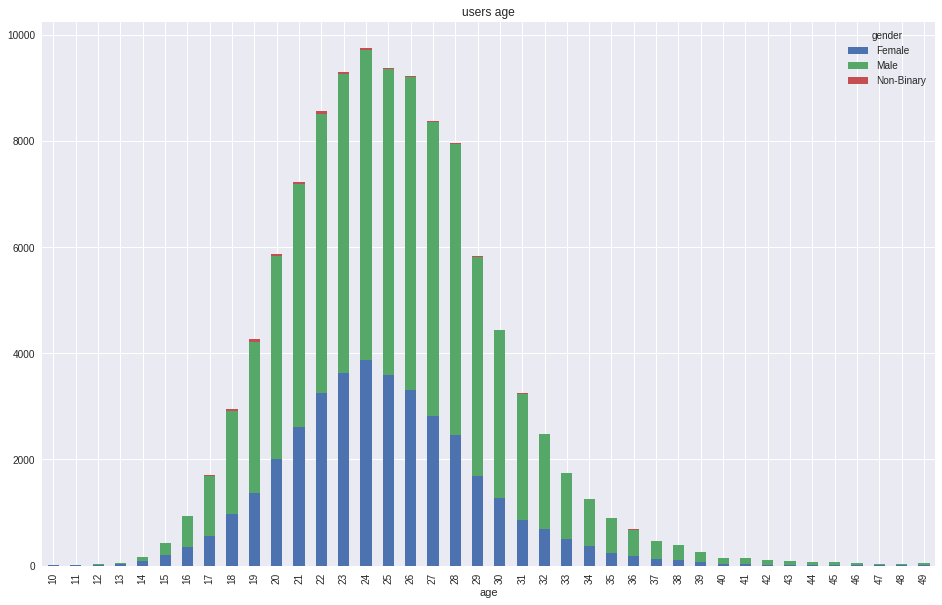

In [26]:
user_gender_age = pd.crosstab(users['age'], users['gender'])
user_gender_age.plot.bar(stacked=True, figsize=(16, 10), title='users age')


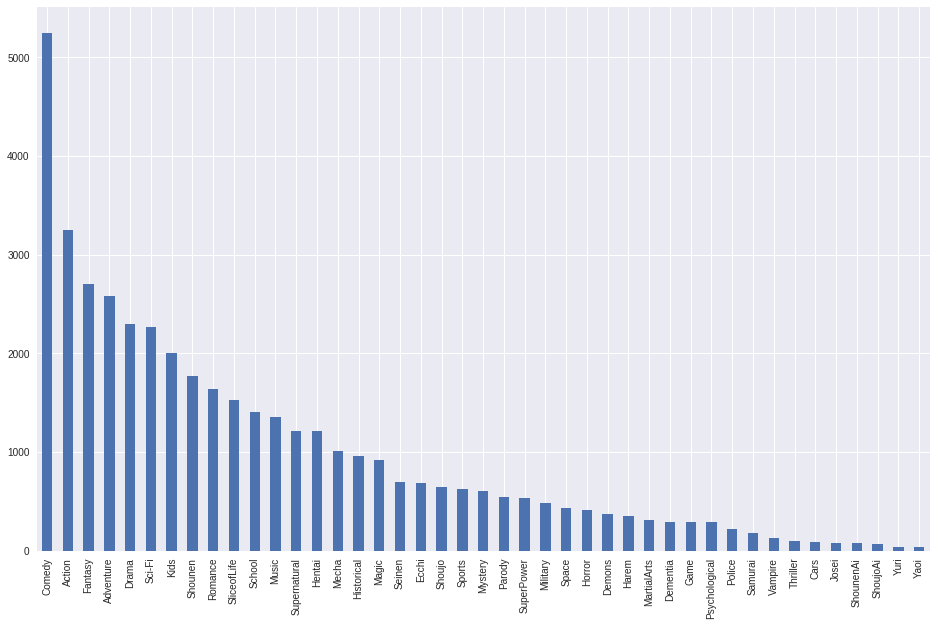

In [4]:
animes['genre'].fillna('', inplace=True)
genres = animes['genre'].apply(lambda x: x.replace(' ', '').split(','))
genres = pd.Series([y for x in genres for y in x if y != '']).value_counts()
genres.plot(kind='bar', figsize=(16, 10))

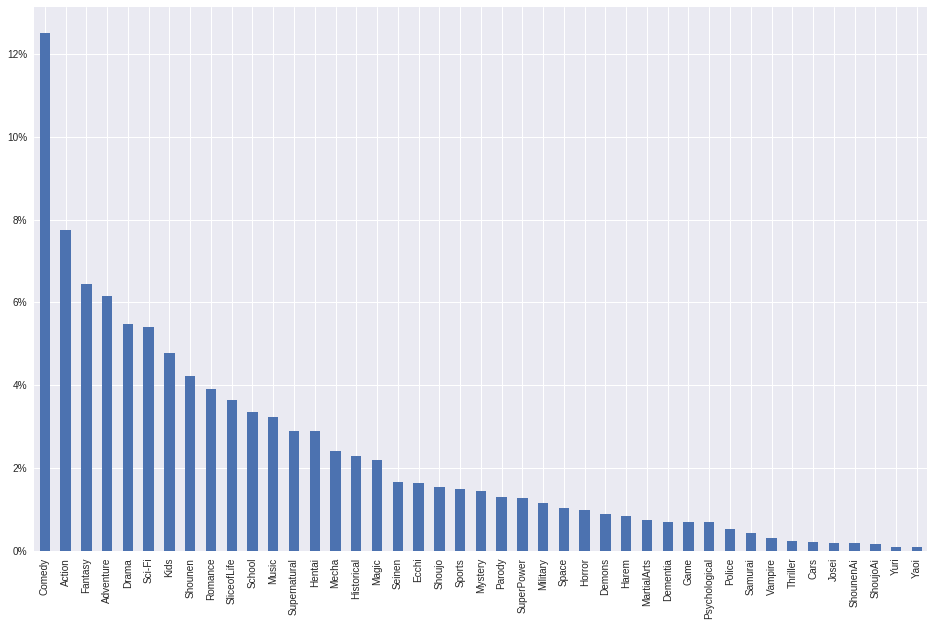

In [9]:
from matplotlib.ticker import FuncFormatter
(genres / genres.sum()).plot(kind='bar', figsize=(16, 10))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

In [10]:
genres / genres.sum()

Comedy           0.125101
Action           0.077497
Fantasy          0.064386
Adventure        0.061502
Drama            0.054684
Sci-Fi           0.054160
Kids             0.047652
Shounen          0.042217
Romance          0.038951
SliceofLife      0.036520
School           0.033516
Music            0.032181
Supernatural     0.029035
Hentai           0.029011
Mecha            0.024052
Historical       0.022789
Magic            0.021955
Seinen           0.016639
Ecchi            0.016329
Shoujo           0.015328
Sports           0.014875
Mystery          0.014446
Parody           0.012872
SuperPower       0.012682
Military         0.011609
Space            0.010393
Horror           0.009845
Demons           0.008892
Harem            0.008415
MartialArts      0.007390
Dementia         0.006985
Game             0.006913
Psychological    0.006865
Police           0.005268
Samurai          0.004172
Vampire          0.002980
Thriller         0.002384
Cars             0.002193
Josei       

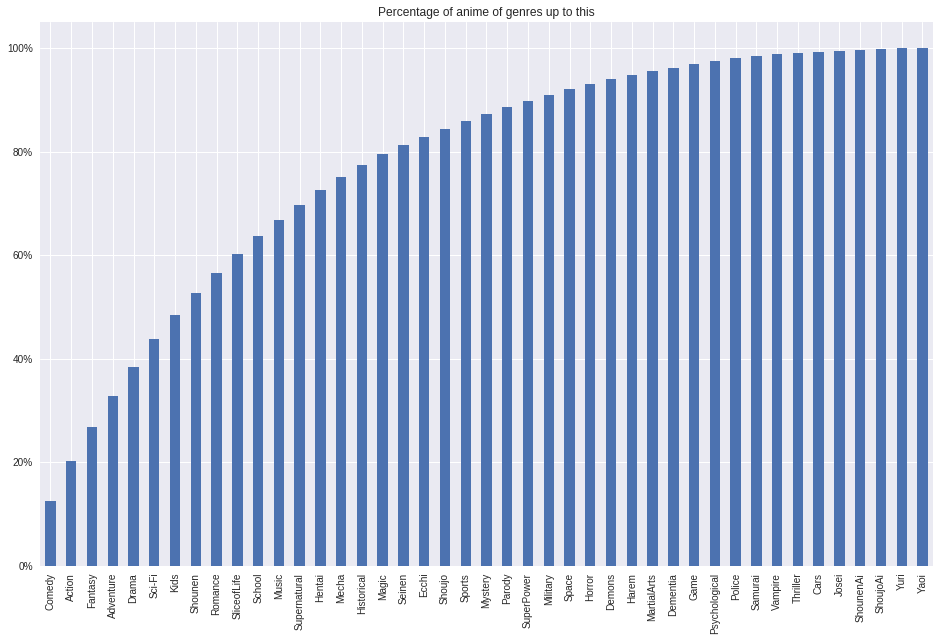

In [13]:
(genres / genres.sum()).cumsum().plot(kind='bar', figsize=(16, 10), title='Percentage of anime of genres up to this')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

In [12]:
(genres / genres.sum()).cumsum()

Comedy           0.125101
Action           0.202598
Fantasy          0.266985
Adventure        0.328486
Drama            0.383170
Sci-Fi           0.437330
Kids             0.484982
Shounen          0.527199
Romance          0.566150
SliceofLife      0.602670
School           0.636186
Music            0.668367
Supernatural     0.697402
Hentai           0.726412
Mecha            0.750465
Historical       0.773254
Magic            0.795209
Seinen           0.811847
Ecchi            0.828176
Shoujo           0.843504
Sports           0.858379
Mystery          0.872825
Parody           0.885697
SuperPower       0.898379
Military         0.909988
Space            0.920381
Horror           0.930226
Demons           0.939118
Harem            0.947533
MartialArts      0.954923
Dementia         0.961907
Game             0.968820
Psychological    0.975685
Police           0.980954
Samurai          0.985125
Vampire          0.988105
Thriller         0.990489
Cars             0.992682
Josei       

In [15]:
print('total percentage of some genres: ', (genres[['Yuri', 'Yaoi', 'ShounenAi', 'ShoujoAi']] / genres.sum()).sum())

total percentage of some genres:  0.005387365911799761


In [24]:
# now calculating for anime if they contain genre, so numbers will be higher and they won't sum to 1
animes_genres = animes['genre'].apply(lambda x: x.replace(' ', ''))
# can not use reverse isin, must use str.contains
genres_occurence = pd.Series({genre: (animes_genres.str.contains(genre)).sum() for genre in genres.index})
#animes_genres.str.contains('Yuri')

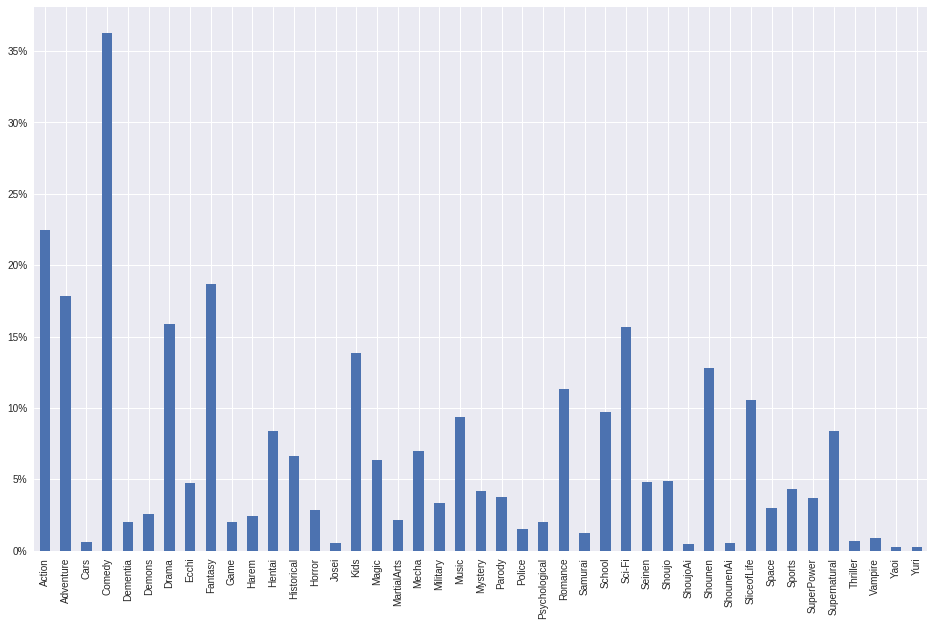

In [31]:
(genres_occurence / animes.shape[0]).plot(kind='bar', figsize=(16, 10))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

In [33]:
print('total percentage of some genres: ', (genres_occurence[['Yuri', 'Yaoi', 'ShounenAi', 'ShoujoAi']] / animes.shape[0]).sum())
print('total percentage of some genres: ', (genres_occurence[['Yuri', 'Yaoi']] / animes.shape[0]).sum())

total percentage of some genres:  0.015620680121647775
total percentage of some genres:  0.00552944429084877


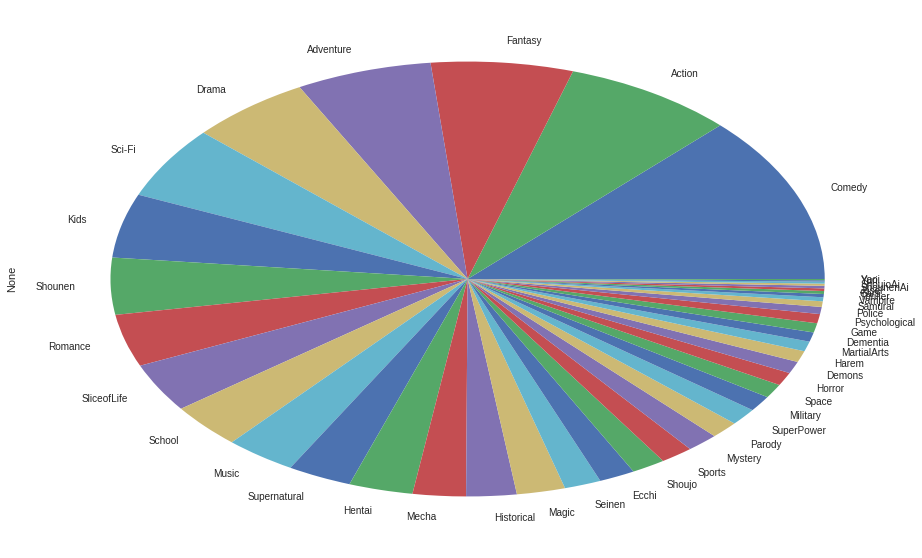

In [28]:
genres.plot.pie(figsize=(16, 10))

In [29]:
genres_years = pd.crosstab(animes['aired_from'].dt.year, animes['genre'])

In [30]:
display(animes['aired_from'].dt.year.describe())
years_diff = int(animes['aired_from'].dt.year.max() - animes['aired_from'].dt.year.min()) + 1
display(years_diff)
anime_aired_year = animes['aired_from'].dt.year.dropna().astype(np.int)

count    12781.000000
mean      2004.530318
std         13.018193
min       1917.000000
25%       1998.000000
50%       2009.000000
75%       2014.000000
max       2018.000000
Name: aired_from, dtype: float64

102

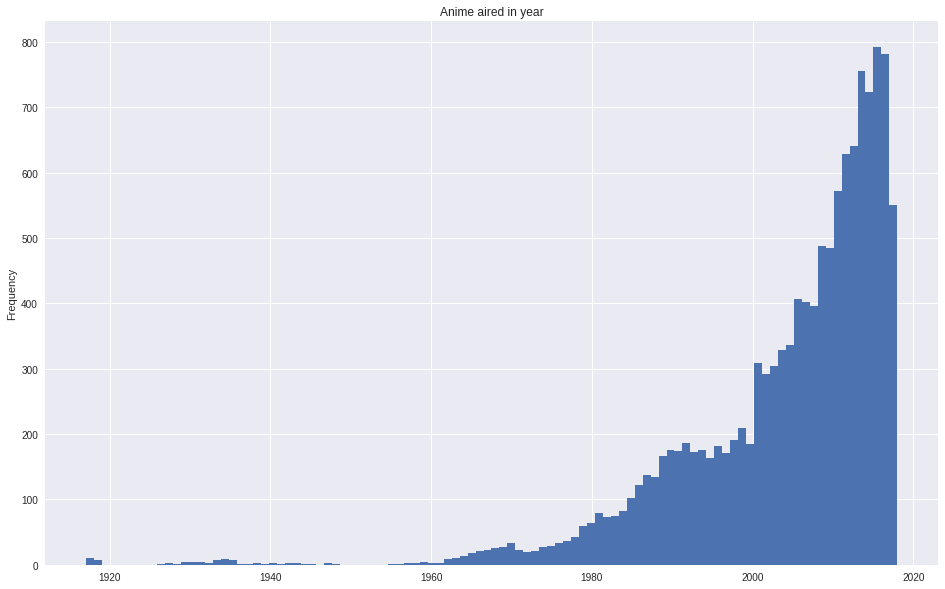

In [31]:
anime_aired_year.plot(kind='hist', bins=years_diff, figsize=(16, 10), title='Anime aired in year')

(2000, 2018)

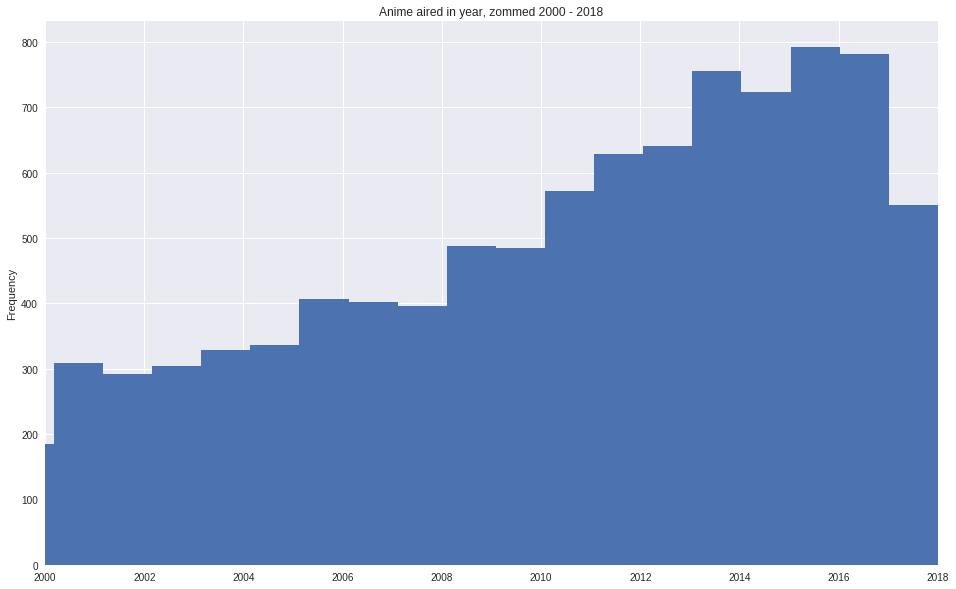

In [32]:
anime_aired_year.plot(kind='hist', bins=years_diff, figsize=(16, 10), title='Anime aired in year, zommed 2000 - 2018')
plt.gca().set_xlim([2000, 2018])

In [33]:
animes[animes['title'] == 'Usavich']['aired']

512    {'from': '2018-05-12', 'to': '2018-05-12'}
Name: aired, dtype: object

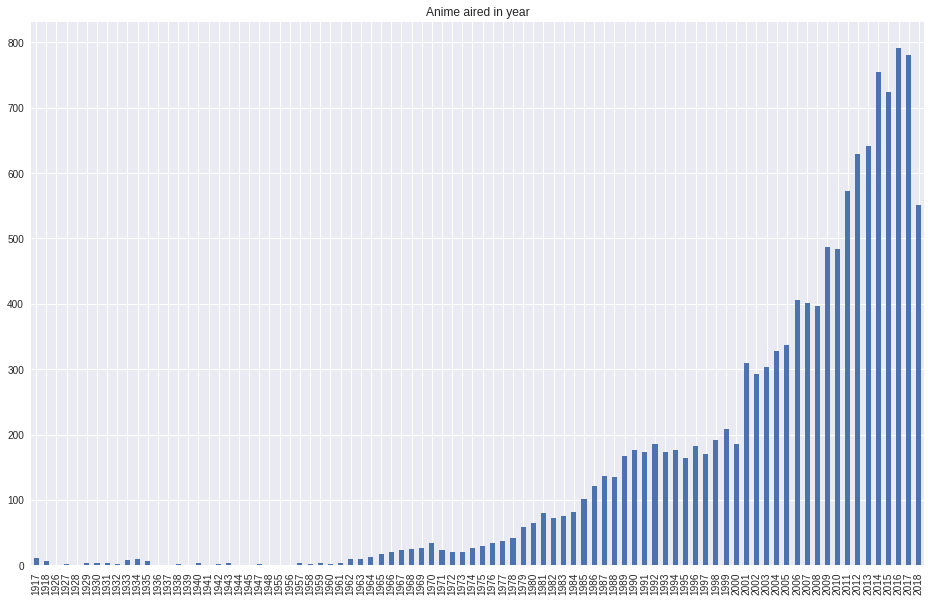

In [34]:
anime_aired_year.value_counts().sort_index().plot.bar(figsize=(16, 10), title='Anime aired in year')

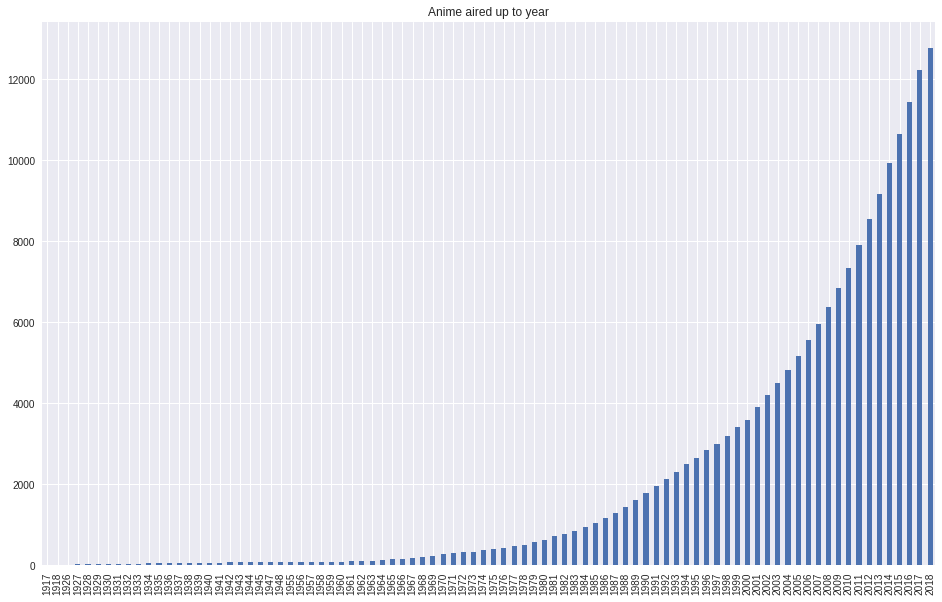

In [35]:
anime_aired_year.value_counts().sort_index().cumsum().plot.bar(figsize=(16, 10), title='Anime aired up to year')

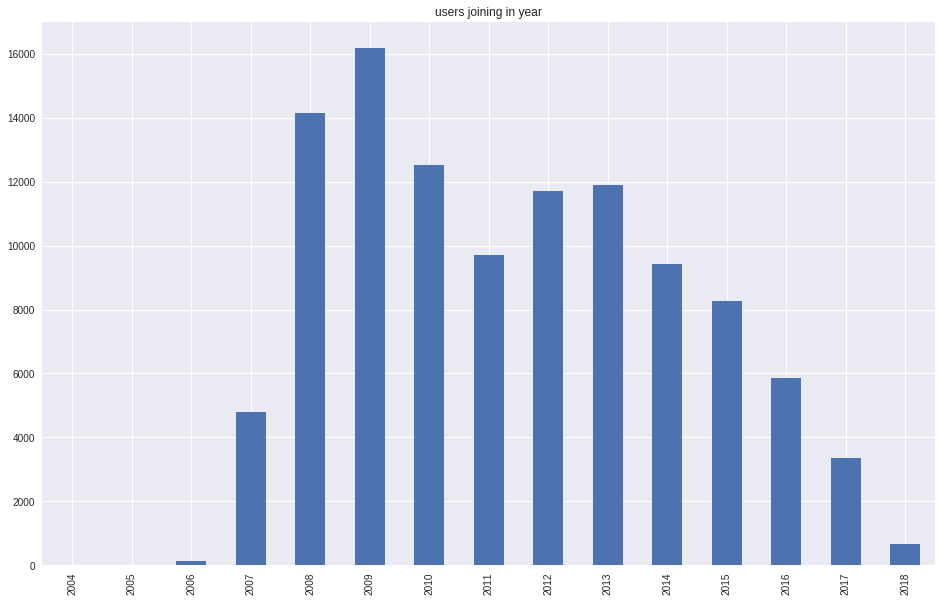

In [36]:
users['join_date'].dt.year.value_counts().sort_index().plot.bar(figsize=(16, 10), title='users joining in year')

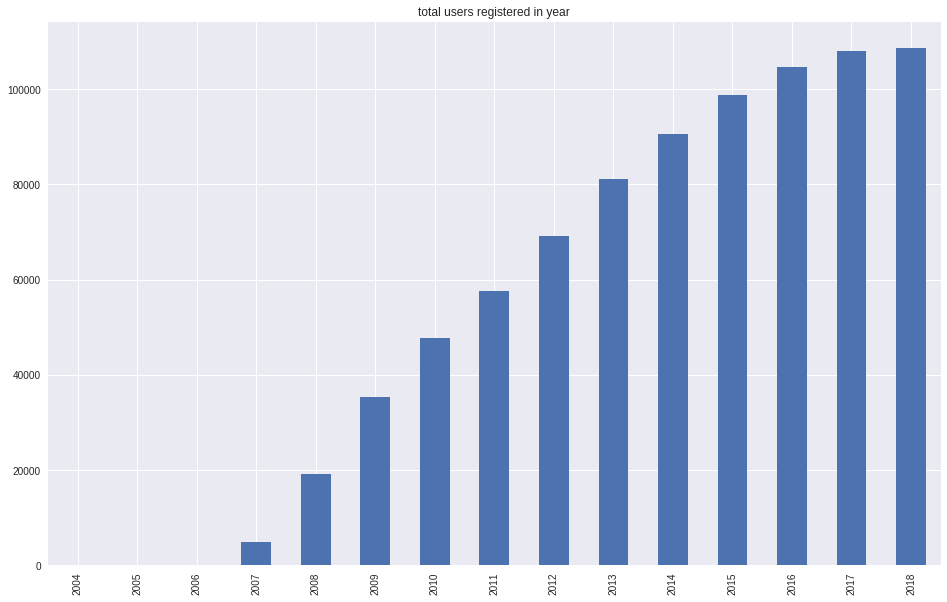

In [37]:
users['join_date'].dt.year.value_counts().sort_index().cumsum().plot.bar(figsize=(16, 10), title='total users registered in year')

In [38]:
users = users.set_index('username')
# counting 0 score, which is not rated, drastically moves both mean and variance
users['rating_mean'] = animelists[animelists['my_score'] != 0].groupby('username')['my_score'].mean()
users['rating_var'] = animelists[animelists['my_score'] != 0].groupby('username')['my_score'].var()

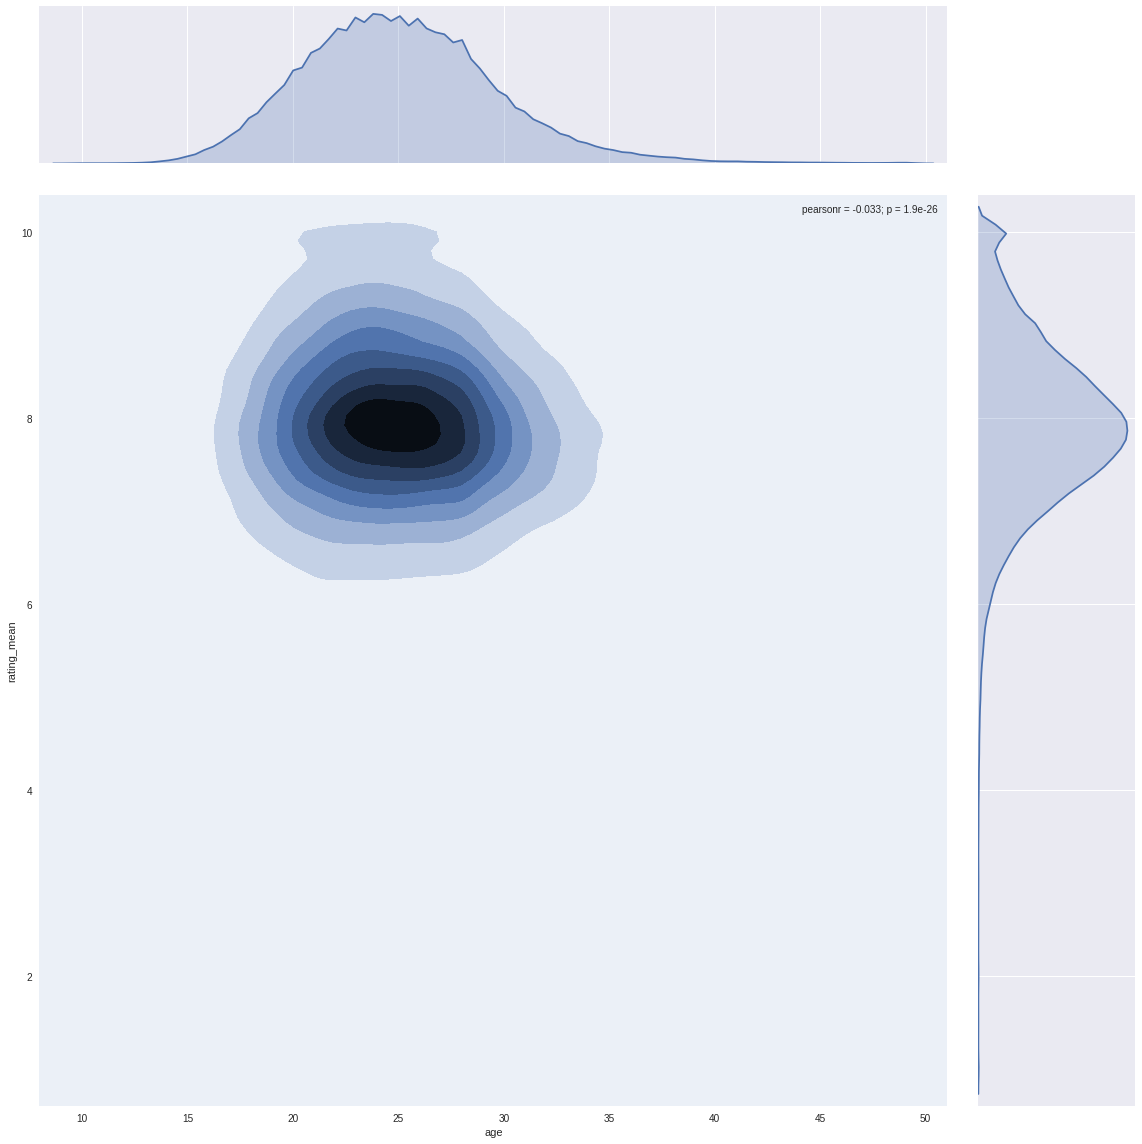

In [39]:
sns.jointplot(x='age', y='rating_mean', data=users, size=16, kind='kde')

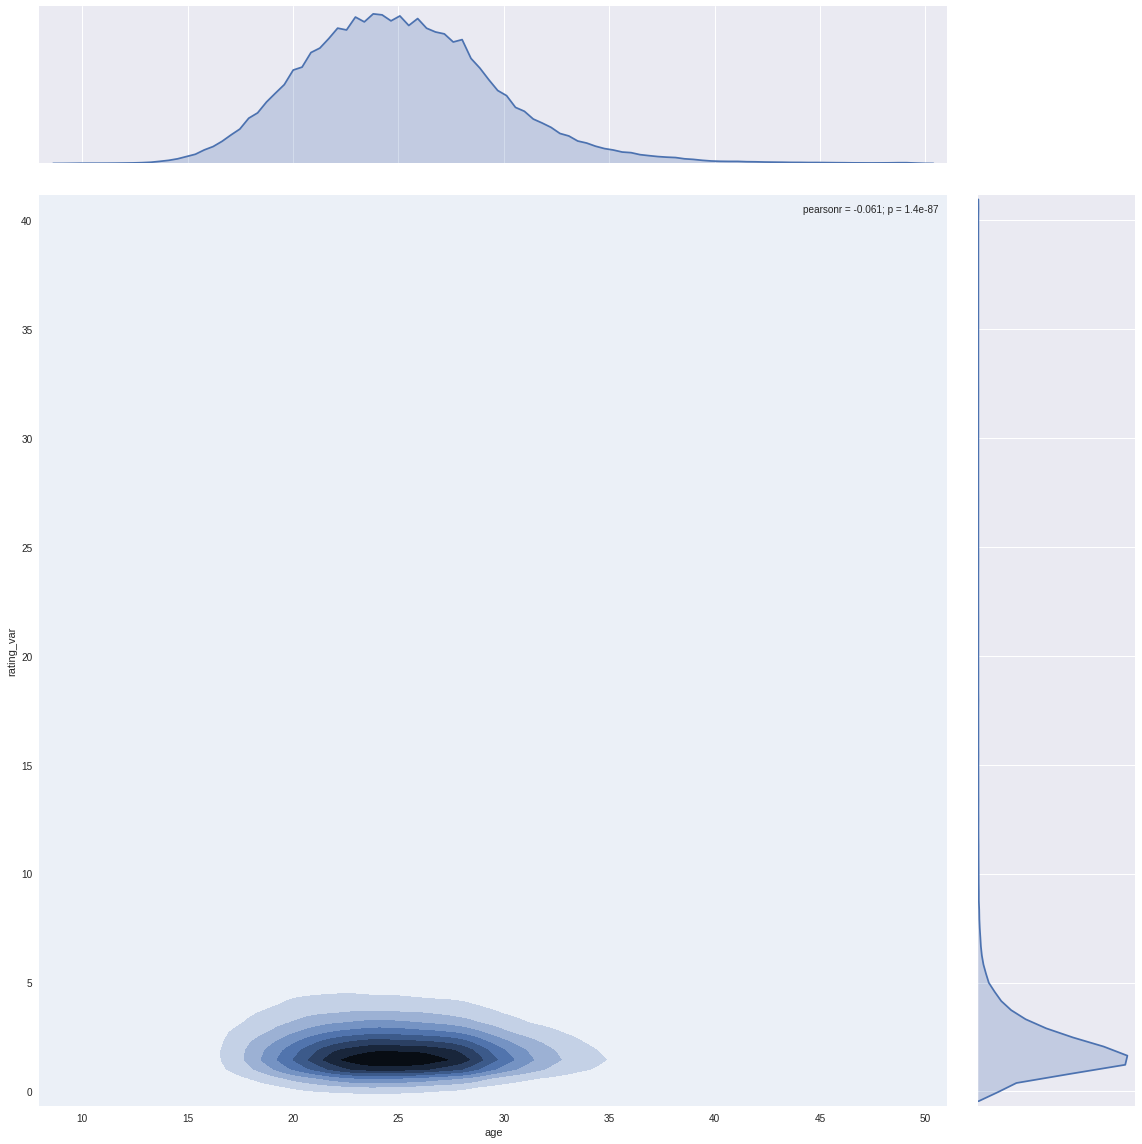

In [40]:
sns.jointplot(x='age', y='rating_var', data=users, size=16, kind='kde')

In [41]:
users['seen_anime'] = animelists.groupby('username')['anime_id'].count()

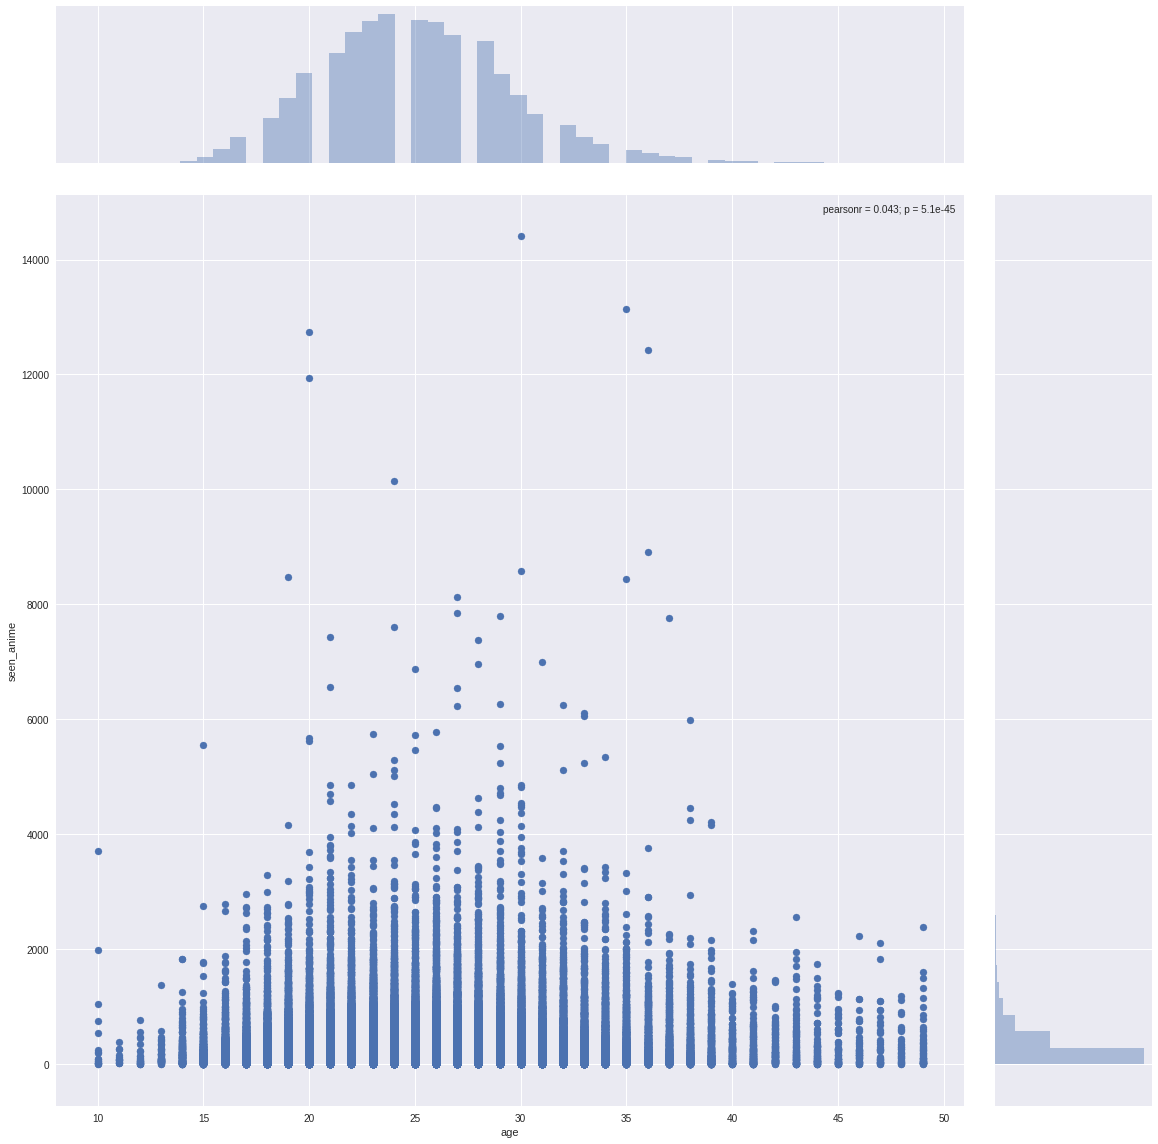

In [42]:
sns.jointplot(x='age', y='seen_anime', data=users, size=16)

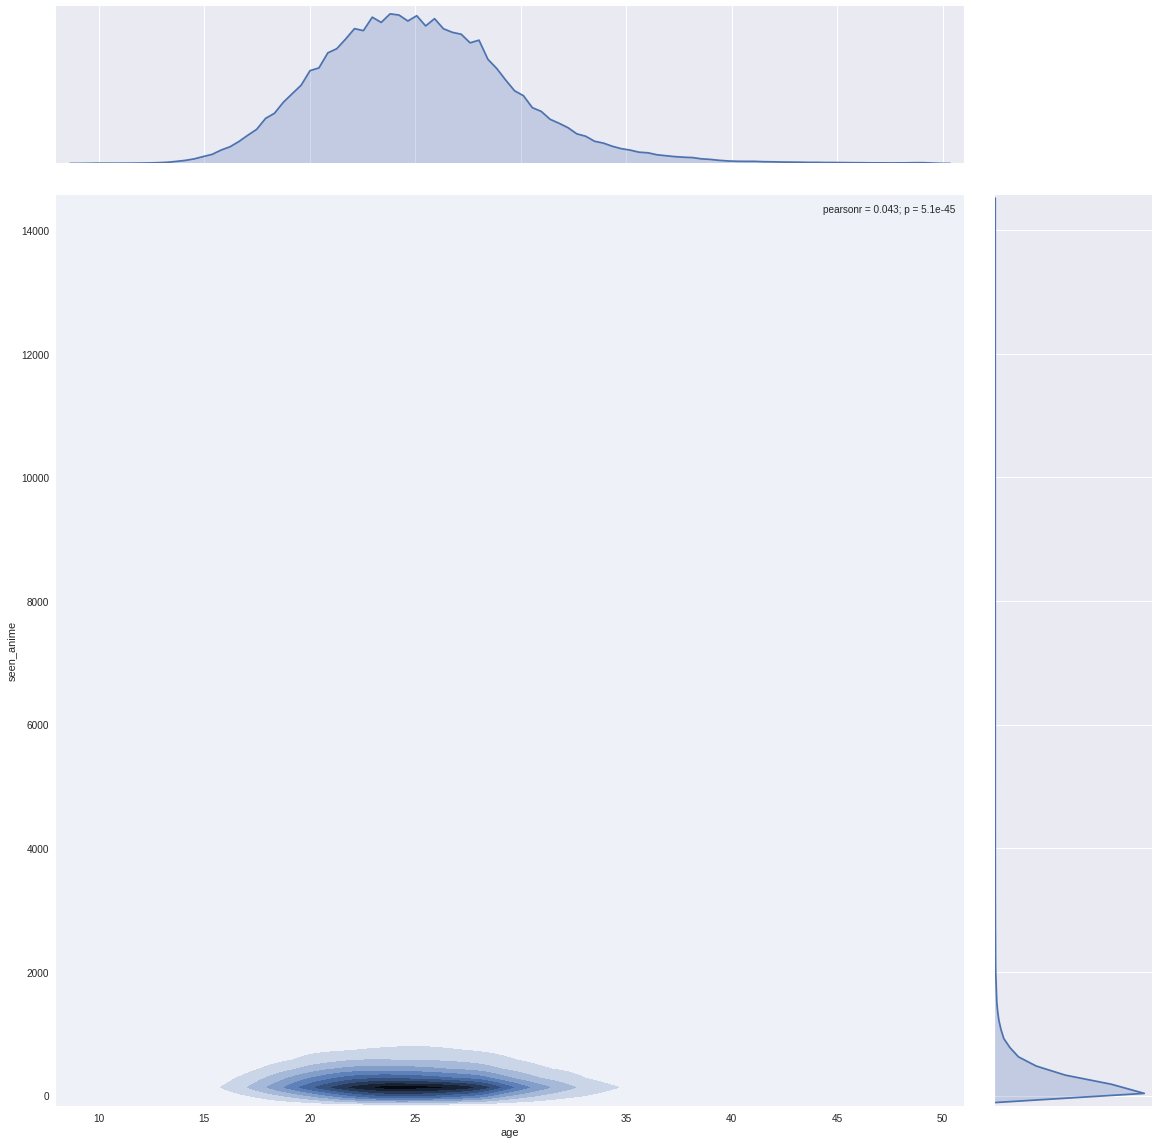

In [43]:
sns.jointplot(x='age', y='seen_anime', data=users, size=16, kind='kde')

In [44]:
users['registered_time'] = users['last_online'] - users['join_date']

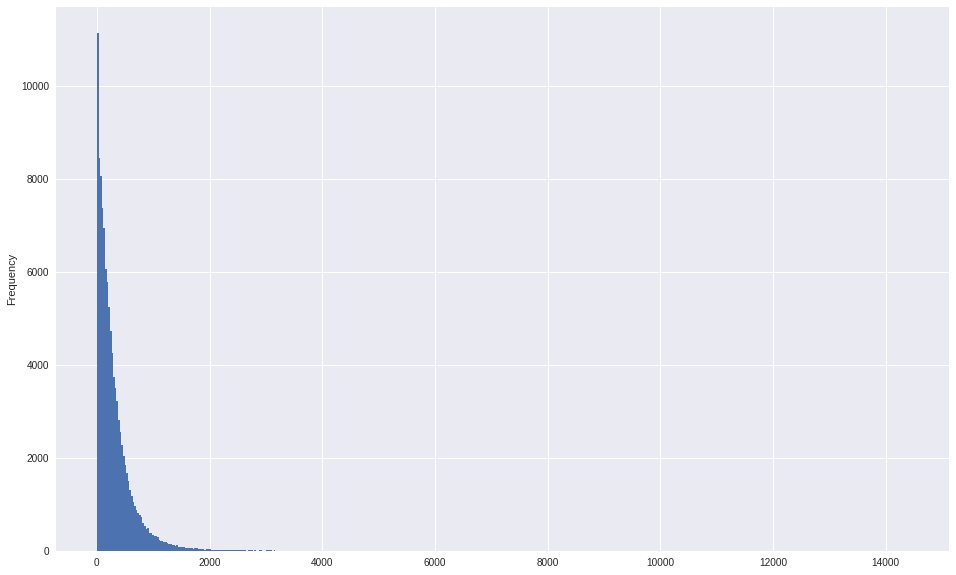

In [50]:
users['seen_anime'].plot(kind='hist', bins=500, figsize=(16, 10))

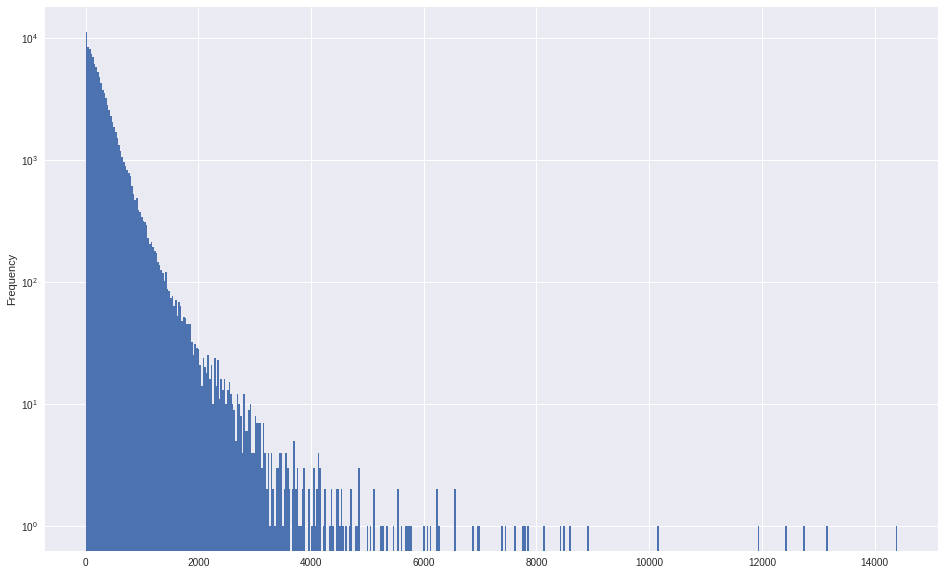

In [59]:
users['seen_anime'].plot(kind='hist', bins=500, figsize=(16, 10), logy=True)

In [58]:
users['registered_time'].plot(kind='hist', figsize=(16, 10))

TypeError: Empty 'DataFrame': no numeric data to plot

In [57]:
users[users['seen_anime'] > 5000]['seen_anime'].value_counts()

6873     1
7614     1
7772     1
11931    1
5722     1
8909     1
7381     1
13140    1
6995     1
7441     1
5009     1
12432    1
6541     1
8586     1
12745    1
7801     1
5126     1
5250     1
14404    1
5123     1
8130     1
6109     1
5470     1
6240     1
5296     1
5787     1
7858     1
8439     1
5686     1
6965     1
5043     1
5618     1
5745     1
5551     1
5235     1
8484     1
6065     1
5996     1
5356     1
10152    1
5543     1
6566     1
6244     1
6272     1
Name: seen_anime, dtype: int64

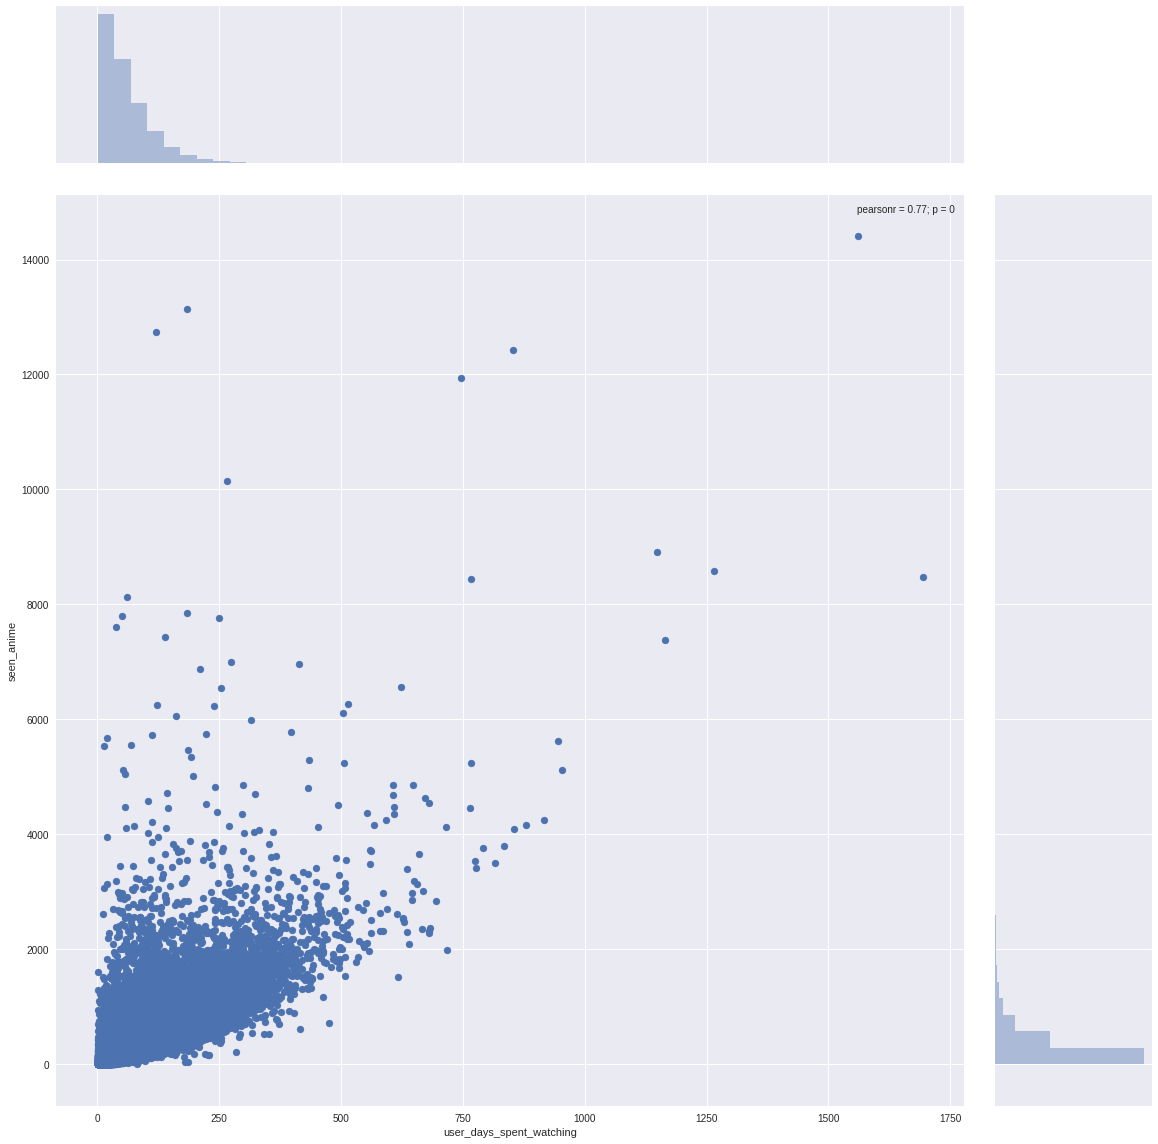

In [62]:
sns.jointplot(x='user_days_spent_watching', y='seen_anime', data=users, size=16)

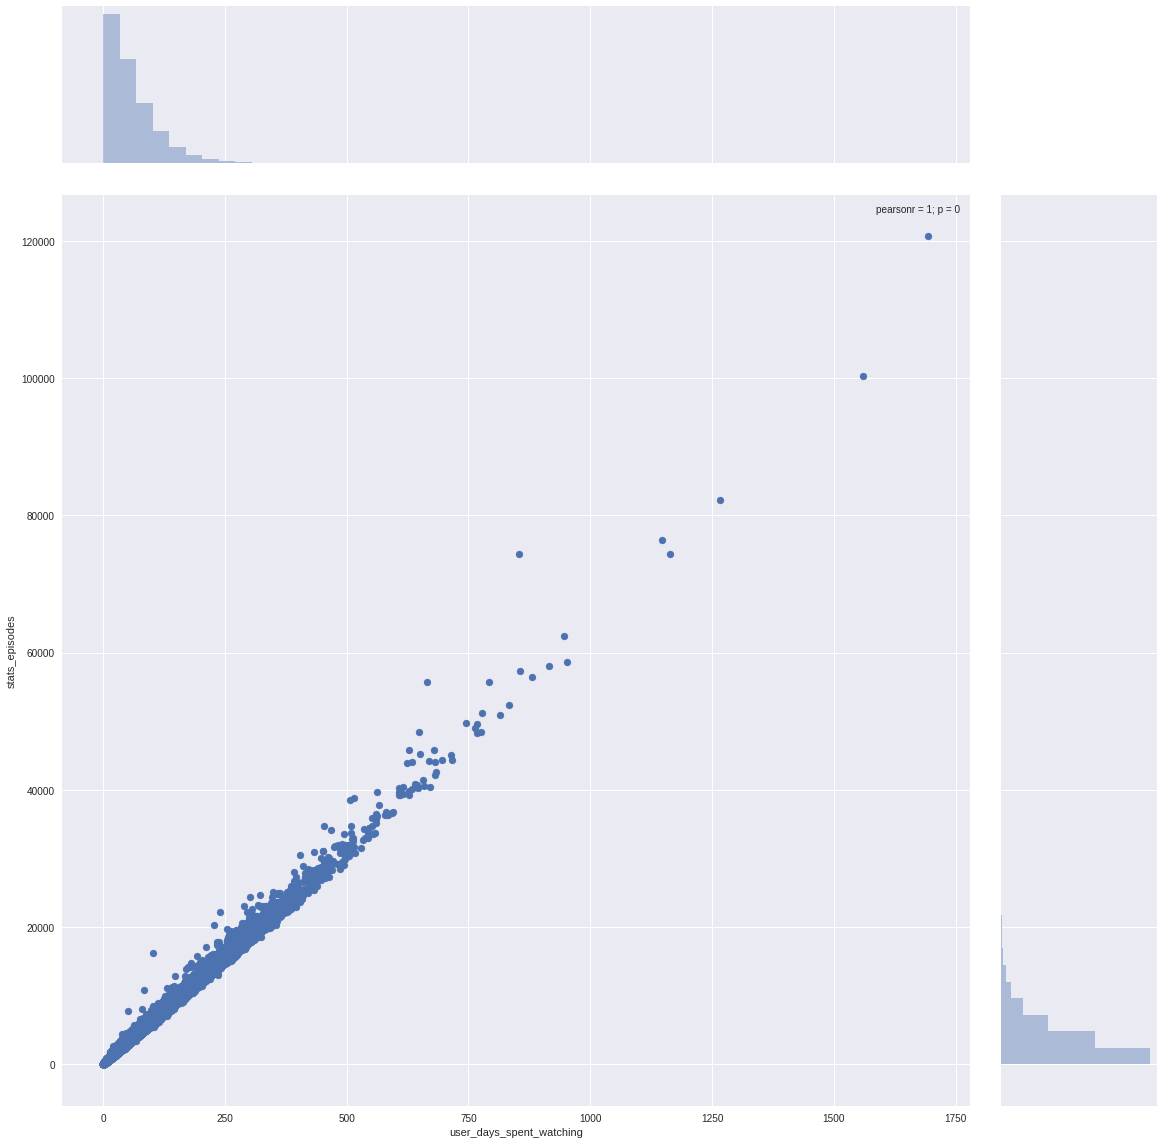

In [63]:
sns.jointplot(x='user_days_spent_watching', y='stats_episodes', data=users, size=16)

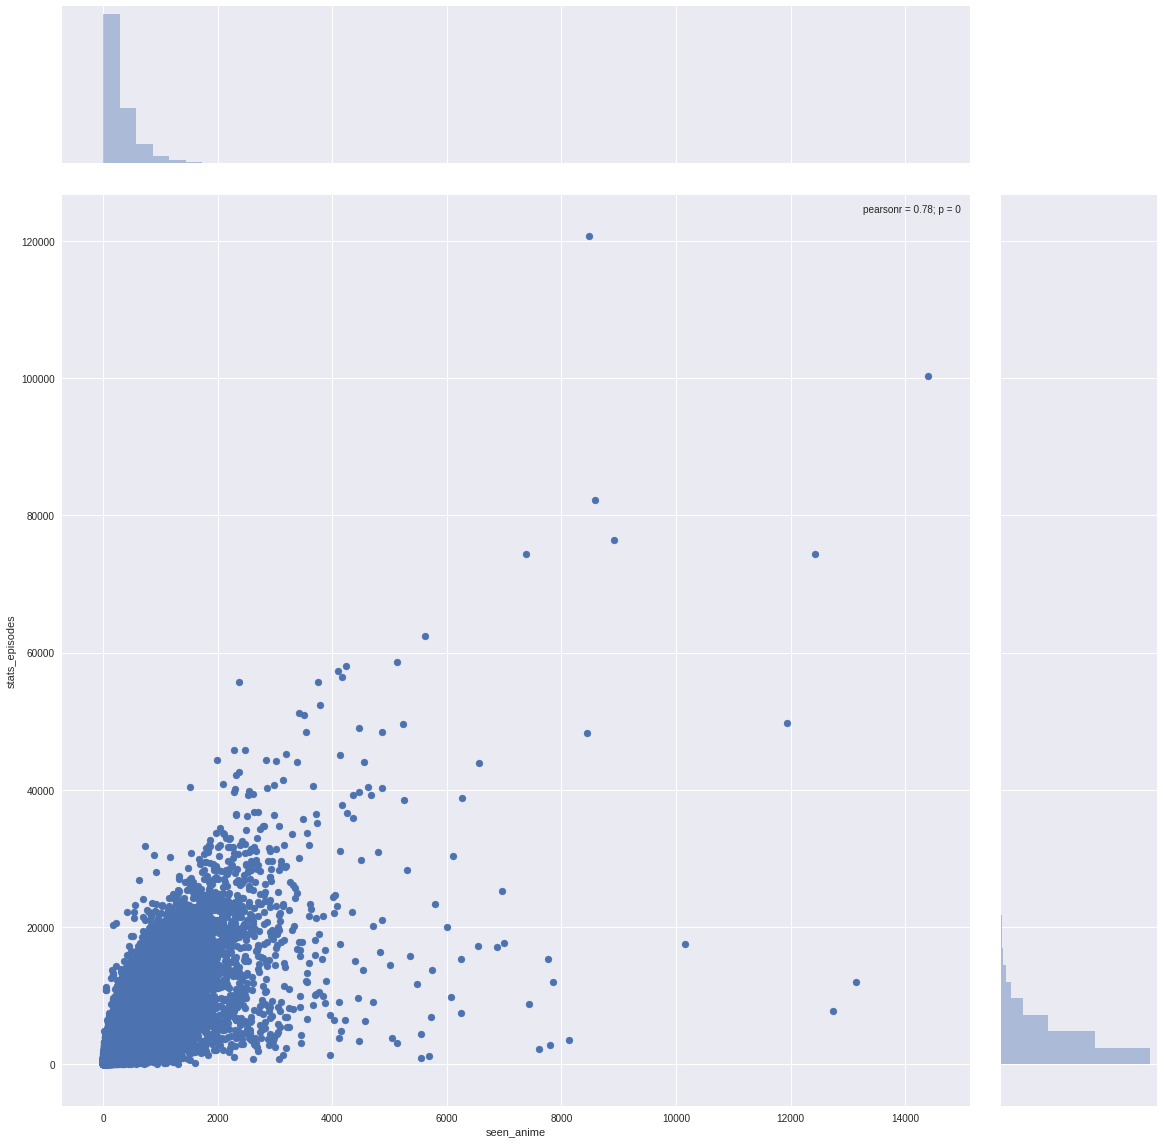

In [64]:
sns.jointplot(x='seen_anime', y='stats_episodes', data=users, size=16)

In [66]:
users.columns

Index(['user_id', 'user_watching', 'user_completed', 'user_onhold',
       'user_dropped', 'user_plantowatch', 'user_days_spent_watching',
       'gender', 'location', 'birth_date', 'access_rank', 'join_date',
       'last_online', 'stats_mean_score', 'stats_rewatched', 'stats_episodes',
       'age', 'born_1_1', 'rating_mean', 'rating_var', 'seen_anime',
       'registered_time'],
      dtype='object')

In [73]:
users['rating_mean'].isnull().sum()

2296

In [75]:
users['rating_mean'].fillna(0, inplace=True)
users['rating_var'].fillna(0, inplace=True)

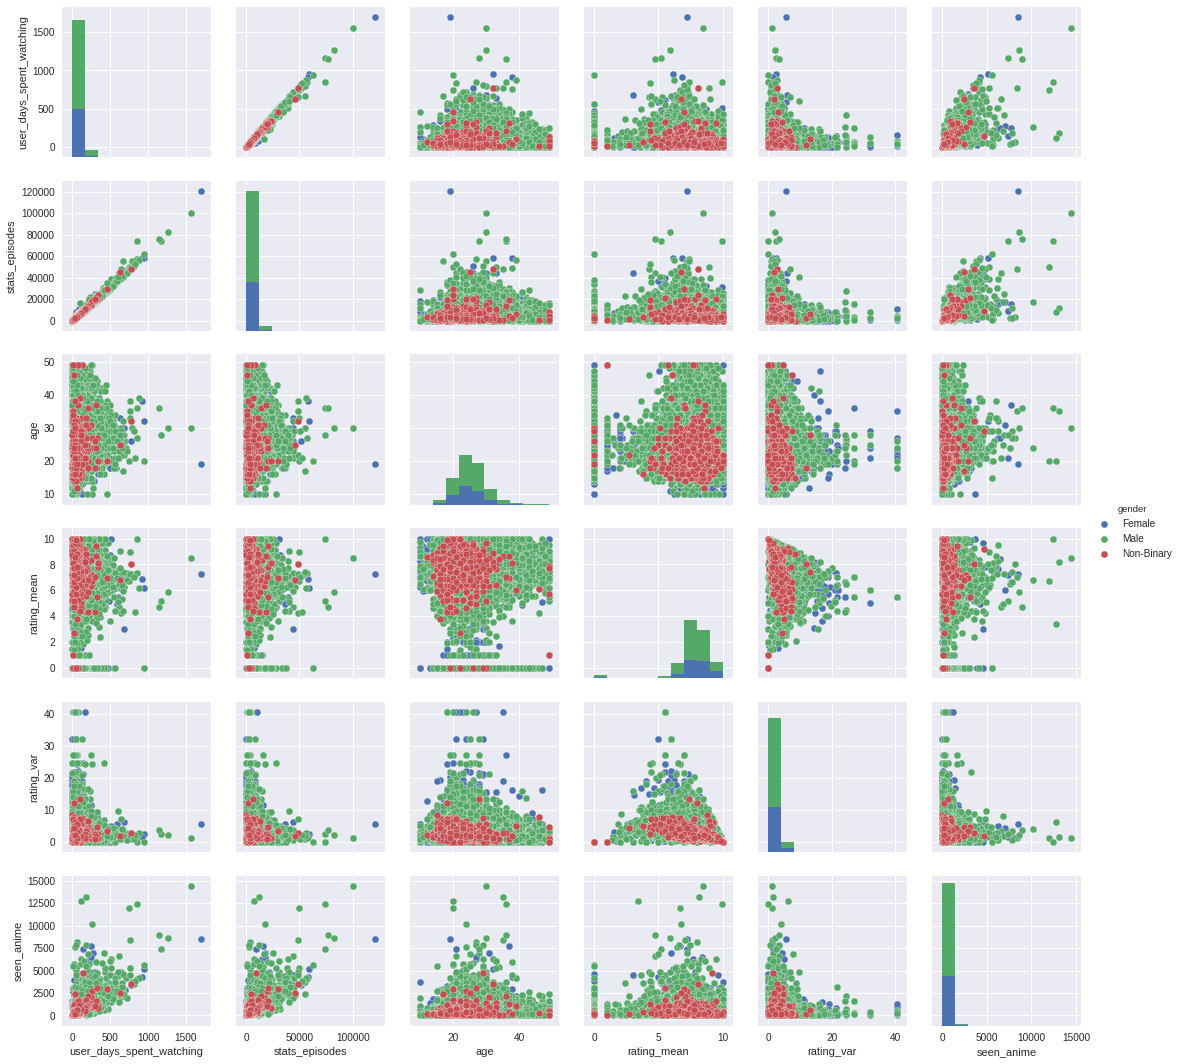

In [77]:
sns.pairplot(users[['user_days_spent_watching',
       'gender', 'birth_date', 'join_date',
       'last_online', 'stats_episodes',
       'age', 'rating_mean', 'rating_var', 'seen_anime',
       'registered_time']], hue='gender')

In [79]:
print('going to delete {} users with 70k episodes or more'.format((users['stats_episodes'] >= 70000).sum()))
users_small = users[users['stats_episodes'] < 70000]

going to delete 6 users with 70k episodes or more


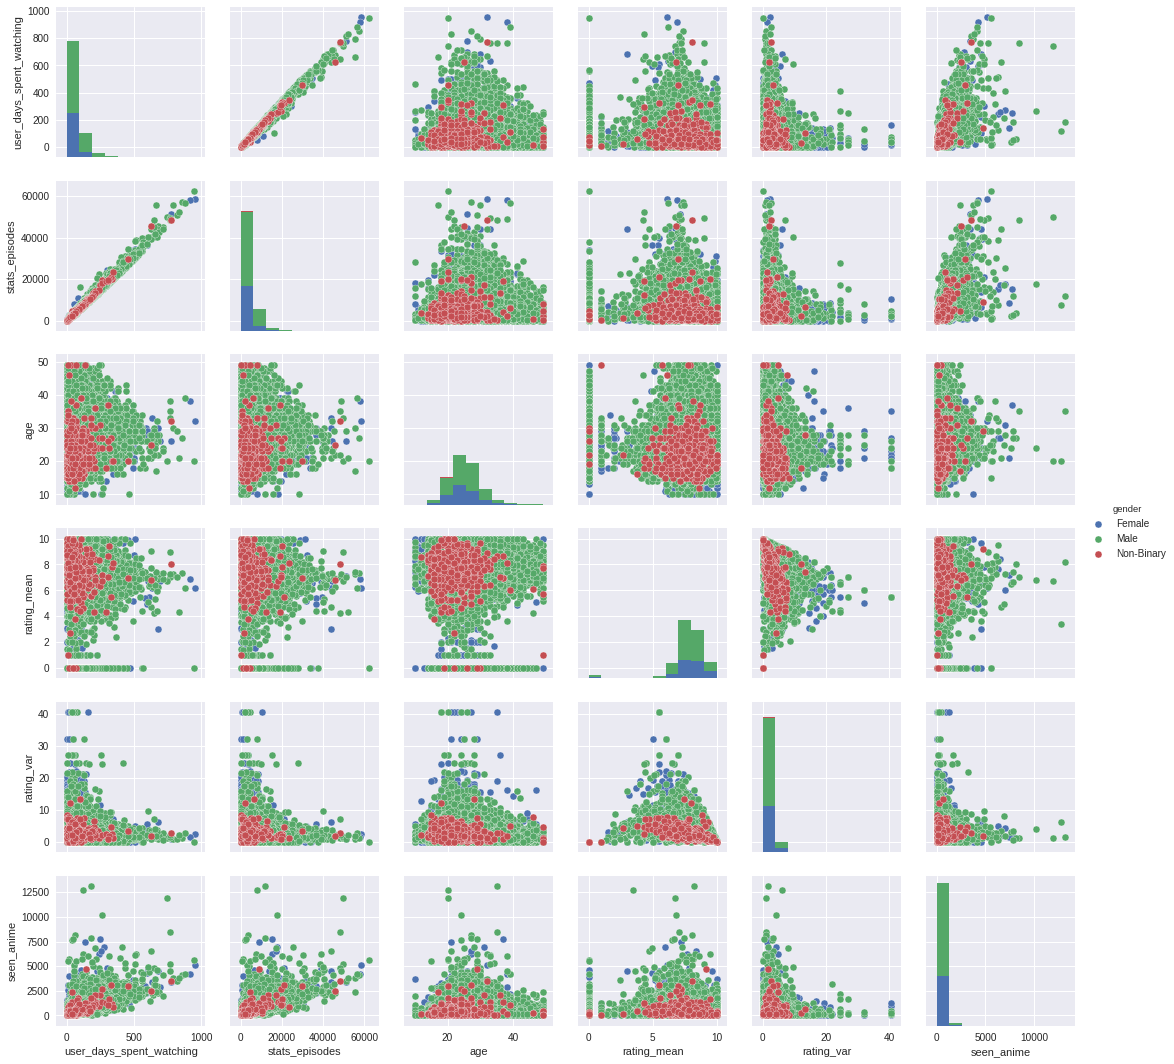

In [80]:
sns.pairplot(users_small[['user_days_spent_watching',
       'gender', 'birth_date', 'join_date',
       'last_online', 'stats_episodes',
       'age', 'rating_mean', 'rating_var', 'seen_anime',
       'registered_time']], hue='gender')